# Robot fun with ROS 2

**Igor Zubrycki**: [@IgorZub](https://twitter.com/IgorZub)
Lodz University of Technology and Marketlab

Slides and repo: https://github.com/AdoHaha/ros_fun


Robots are fun to watch and fun to play. 





In [63]:
from IPython.display import HTML, IFrame
IFrame("https://www.youtube.com/embed/FM3FzZ81KOU",560,315)

In [64]:
IFrame(width="560", height="315", src="https://www.youtube.com/embed/D8_VmWWRJgE")

In [75]:
IFrame(width="560", height="315", src="https://www.youtube.com/embed/LfRwhA2H9fw")


# What are robots, anyway?


# Motion + Intelligence

You want the robot to be able to create complicated behaviors and be able to realize them.

# It is quite complicated in practice

In [68]:
IFrame(width="560", height="315", src="https://www.youtube.com/embed/g0TaYhjpOfo")

![Micromouse](images/micromouse.jpg)

Cool to start but quite limited -- sensors? AI? connectivity? path planning?

!["Interdisciplinary field"](images/robotics.png)

# Is it even possible then?



# Yes, and the answer is ROS (2) ;)

![ROS2 dashing](images/dashing.png)

# ROS - Robot Operating System gives you:

 - ### tools -- ways to do stuff
 - ### pipes -- ways to connect stuff together
 - ### devel tools -- ways to make your own tools and stuff
 - ### community -- ways to learn stuff and find friends

# ROS - Robot Operating System gives you:

 - ### tools -- ways to do stuff (motion, behaviours, drivers, intelligence ...)
 - ### pipes -- ways to connect stuff together (synchronous, asynchronous, data bases)
 - ### devel tools -- ways to make your own tools and stuff (simplified importing, packaging, building, sharing)
 - ### community -- ways to learn stuff and find friends (forums, books, university lectures ;))

# ROS 2 ?

Second iteration of the Framework

Possible to make it (quite) safe -- good enough for Self Driving Cars

Communication can be much faster 

Works not only on Linux ♡ but also on MacOS and Windows, better on embedded devices

Somewhat better organised, better programming practices

Newer 


# The main idea of ROS is to enable developers and makers:

## you receive a universal system and build your dream robot on the top of it

# You stand ot the shoulders of giants

![standing on the shoulders of giants](images/standing-on-the-shoulders-of-giants.png)


# So how to start?



# I suggest:

 - ## Set the most interactive system possible
 - ## Work in simulations, understand tools one by one
 - ## Use ready-made tools and packages when possible
 - ## Even if you want to work on a big project, buy a toy robot to understand the problem
 - ## Use the forums, many issues are completely non-obvious and hard to isolate
 

# This way you can start having fun first, worry later



# Ways of starting ROS 2 exploration:

- [Native on Ubuntu, Windows, ChromeOS](https://index.ros.org/doc/ros2/Installation/)
- VirtualBox ([for example provided by MathWorks](https://www.mathworks.com/support/product/robotics/ros2-vm-installation-instructions-v3.html)
- containerized (problematic starting of GUI applications)
- containerized but with VNC accessable desktop environment (this is what I will be using during this presentation)

A repo with dockerfiles and docker-compose files is available at https://github.com/AdoHaha/ros_fun.



In [42]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Using the repo container


Clone the repository: `git clone https://github.com/AdoHaha/ros_fun.git`

`cd ros_fun`

Use `docker-compose up` to start the container. 

Navigate to: http://localhost:6080/
from the host computer type:

`docker container exec -it--user ubuntu fun_ros_ros2_1 jupyter notebook --notebook-dir="./src/jupyter_notebooks"
`

In different tab navigate http://localhost:8888

### Let's start running some robots

By putting in two terminals (though novnc view):
in one:

`ros2 run turtlesim turtlesim_node`

in second

`ros2 run turtlesim turtle_teleop_key`

you get turtle robot and a way to control it through keyboard.

I will use a helper function to run it from here

In [1]:
from run_lx import run_lxterminal

In [ ]:
run_lxterminal("ros2 run turtlesim turtlesim_node")
run_lxterminal("ros2 run turtlesim turtle_teleop_key")

We can play around by controling (teleoperating) robots with keyboard

Obviously it is much more fun to control it from Python.
To do this we need to create a **publisher** that publishes **twist**, that is 6 different parameters
x,y,z velocity and
yaw, pitch,roll rotational velocity

![Yaw Pitch Roll](./images/yaw-pitch-roll.png)


# Building a node with a publisher

![Node, publisher subscriber](https://index.ros.org/doc/ros2/_images/Nodes-TopicandService.gif)

In [39]:
import rclpy
from rclpy.node import Node


from geometry_msgs.msg import Twist

class TurtleMover(Node): #here we define new node

    def __init__(self): 
        super().__init__('turtle_mover')
        #we add publisher
        self.publisher_ = self.create_publisher(Twist, 'turtle1/cmd_vel', 10)


    def move_turtle(self,twist_command): #we add helper function
        self.publisher_.publish(twist_command)




In [3]:
rclpy.init()

In [4]:
turtle_mover = TurtleMover()


With the setup ready, we create a *message* object and fill the linear velocity x property

We than publish to the turtle1/cmd_vel topic

In [ ]:
twist_command = Twist()

twist_command.linear.x = 1.0

turtle_mover.move_turtle(twist_command)

Using this we created our first **node** turtle_mover
and connected it to a different node *turtlesim*

We can see this using `rqt_graph` command in the terminal

In [40]:
run_lxterminal("rqt_graph")

We can send a series of messages to have particular robot behaviour

In [ ]:
from types import MethodType

move_front = Twist()
move_front.linear.x = 1.0
turn_right = Twist()
turn_right.angular.z =1.0


def make_shape(self):
    if hasattr(self,"n_moves"):
        self.n_moves+=1 
    else: 
        self.n_moves= 1
    if self.n_moves % 2 == 0:
        
        self.move_turtle(move_front)
    else:
        self.move_turtle(turn_right)

turtle_mover.heart_move =  MethodType(make_shape,
                                      turtle_mover) #create a new method for the node instance
turtle_mover.timer = turtle_mover.create_timer(1.0,
                                               turtle_mover.heart_move)
    

# Spinning

We need to start spining to start receiving event calls -- such as timers or more

In [ ]:

rclpy.spin(turtle_mover) #start spinning the context
#

In [ ]:
turtle_mover.timer.cancel()

# Subscribing to topics
There is so much that you can do with robots without getting some feedback and sensory data. 

In ROS you usually do this by subscribing to topics.
With our little turtle we can access its position. Let's start by reading it



In [41]:
from turtlesim.msg import Pose

def print_sensor_info_callback(self, msg):
    print(msg)
    
turtle_mover.print_sensor_info_callback =  MethodType(print_sensor_info_callback, turtle_mover) #create a new method for the node instance
turtle_mover.subscription = turtle_mover.create_subscription(Pose,"turtle1/pose", turtle_mover.print_sensor_info_callback,10)

NameError: name 'MethodType' is not defined

In [ ]:
rclpy.spin(turtle_mover)

### That is a lot of information
we can check how much by a ros2 tool

In [ ]:
!ros2 topic hz /turtle1/pose


In [ ]:
### We can use this information to make a wall avoiding robot

#turtle_mover.subscription.destroy()
turtle_mover.timer.cancel()

def wall_avoider(self, msg):

    wall_distance = 0.1
    move_command = Twist()
    move_command.linear.x = 1.0 # always ride front

    if (msg.x > 10-wall_distance 
        or msg.x< wall_distance 
        or msg.y < wall_distance 
        or msg.y > 10 - wall_distance): #we are near wall
        #print("avoiding wall")
        move_command.linear.x = 0.1 # slow down
        move_command.angular.z = 1.2 # add some rotation
    self.publisher_.publish(move_command)
    

    
turtle_mover.wall_avoider =  MethodType(wall_avoider, turtle_mover) #create a new method for the node instance
turtle_mover.subscription.callback =  turtle_mover.wall_avoider # change callback

In [ ]:
#currentely a way to unsubscribe is a "work in progress" in ROS2 so we just pass messages to function that does nothing
def ignore_messages(msg):
    pass
turtle_mover.subscription.callback = ignore_messages

In [ ]:
rclpy.spin(turtle_mover)

# Actions

While fun,
it would make sense to abstract some behaviours and just wait for some action result - success or failure

This is what actions are for.

![action idea](https://index.ros.org/doc/ros2/_images/Action-SingleActionClient.gif)
From:https://index.ros.org/doc/ros2/Tutorials/Understanding-ROS2-Actions/

In [ ]:
from turtlesim.action import RotateAbsolute
from rclpy.action import ActionClient

easiest_action = ActionClient(turtle_mover,RotateAbsolute,'turtle1/rotate_absolute')


In [ ]:
angle_goal = RotateAbsolute.Goal()
angle_goal.theta = 45.0

easiest_action.send_goal_async(angle_goal)

In [ ]:
import math
def print_feedback(future):
    try:
        print("remaining radians {}".format(future.feedback.remaining))
    except:
        pass
def history_success(future):
    print("done")
    print("radial distance was {}".format(future.result().result.delta))
    
def received_task(future):
    goal_handle =  future.result()
    
    if not goal_handle.accepted:
        print("not accepted")
        return
    
    get_result_future = goal_handle.get_result_async()
    
    get_result_future.add_done_callback(history_success)
    
    
    
#ngle_goal.theta = math.pi/2
angle_goal.theta = -math.pi/2
angle_goal.theta = 0.0

goal_future = easiest_action.send_goal_async(angle_goal,feedback_callback=print_feedback)
goal_future.add_done_callback(received_task)
rclpy.spin(turtle_mover)

# Services

Most classic aproach, we send a request and receive response.




In [ ]:
# Services

from turtlesim.srv import SetPen

service_client = turtle_mover.create_client(SetPen,"turtle1/set_pen")



In [ ]:
new_pen = SetPen.Request() 

new_pen.r = 255
new_pen.width = 5 
service_client.call_async(new_pen)


turtle_mover.move_turtle(twist_command) #move to see effect

# Congrats, you now used all types of ROS 2 communication.

(with the exception of a parameter server ;))



![Dissapointed robot](./images/dissapointed_robot.jpg)

# What has this to do with serious robotics?


Same type of communication is used while using "normal" robots. 

You usually look for the correct topics to subscribe
and build your robot behaviours by connecting different nodes together.

Instead of *turtlesim* let's use Turtlebot as an example ;)

In [5]:
run_lxterminal("ros2 launch turtlebot3_gazebo turtlebot3_world.launch.py")
run_lxterminal("ros2 run turtlebot3_teleop teleop_keyboard")

In the same way as with the turtlesim you can send twist command to control this *real* robot.



In [ ]:
big_turtle_publisher = turtle_mover.create_publisher(Twist, 'cmd_vel', 10)

In [ ]:
new_msg =  Twist()

#new_msg.linear.x = 0.3
new_msg.angular.z = 0.2
big_turtle_publisher.publish(new_msg)

In [43]:
from cv_bridge import CvBridge
import cv2
from sensor_msgs.msg import CameraInfo, Image
%matplotlib inline
import matplotlib.pyplot as plt

import IPython.display # import Image as , display
from io import BytesIO
import matplotlib as mpl


def arr2img(arr):
    """Display a 2- or 3-d numpy array as an image."""
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    # Don't let matplotlib autoscale the color range so we can control overall luminosity
    vmax = 255 if arr.dtype == 'uint8' else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=0, vmax=vmax)
        out = buffer.getvalue()
    return IPython.display.Image(out)

def camera_image_callback(rgb_msg):
    "show the camera image on the global dh display"
    rgb_image = CvBridge().imgmsg_to_cv2(rgb_msg, desired_encoding="rgb8")

    dh.update(arr2img(rgb_image))
    
    return arr2img(rgb_image)
    

#turtle_mover.image_subscription.callback = camera_image_callback
turtle_mover.image_subscription = turtle_mover.create_subscription(Image,
                                                                   "/camera/image_raw", 
                                                                   camera_image_callback,1)

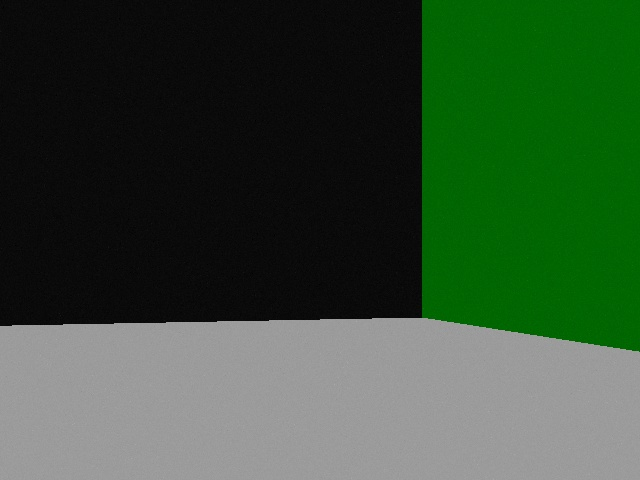

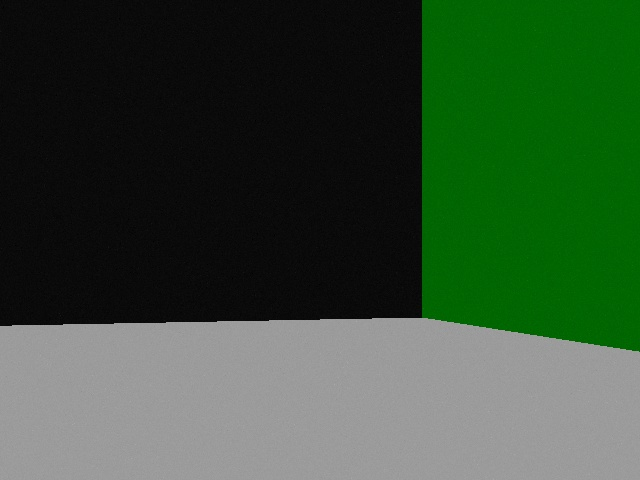

KeyboardInterrupt: 

In [44]:
dh = IPython.display.display(display_id=True)
dh.display("https://image.shutterstock.com/image-vector/example-red-square-grunge-stamp-260nw-327662909.jpg")
rclpy.spin(turtle_mover)

# You use actions for advanced behaviours

Let's see how we can navigate the robot

In [46]:
#Run navigation and send actions

run_lxterminal("ros2 launch turtlebot3_navigation2 navigation2.launch.py use_sim_time:=True map:=/home/ubuntu/turtlebot3_ws/src/jupyter_notebooks/map.yaml")

In [47]:
from geometry_msgs.msg import PoseWithCovarianceStamped

send_start_pose_publisher = turtle_mover.create_publisher(PoseWithCovarianceStamped, 'initialpose', 1)


In [48]:
initial_pose = PoseWithCovarianceStamped()
initial_pose.header.stamp = turtle_mover.get_clock().now().to_msg()
initial_pose.header.frame_id = "map"
initial_pose.pose.pose.position.x = 0.08
initial_pose.pose.pose.position.y = 0.0
initial_pose.pose.pose.orientation.z = 0.0
initial_pose.pose.pose.orientation.w = 1.0

initial_pose.pose.covariance[0] = 0.25
initial_pose.pose.covariance[7] = 0.25
initial_pose.pose.covariance[-1] = 0.06

send_start_pose_publisher.publish(initial_pose)


In [17]:
from geometry_msgs.msg import PoseStamped

send_goal_pose_publisher = turtle_mover.create_publisher(PoseStamped, '/move_base_simple/goal', 1)


In [54]:
goal_pose = PoseStamped()
goal_pose.header.stamp = turtle_mover.get_clock().now().to_msg()
goal_pose.pose.position.x = 3.8
goal_pose.pose.position.y = 1.07
goal_pose.pose.orientation.z = 0.7
goal_pose.pose.orientation.w = 0.71

send_goal_pose_publisher.publish(goal_pose)

In [52]:
#from geometry_msgs.action import 
from nav2_msgs.action import NavigateToPose
from rclpy.action import ActionClient
from geometry_msgs.msg import PoseStamped

navigate_action = ActionClient(turtle_mover, NavigateToPose, '/NavigateToPose')


In [55]:


def print_feedback_goal(future):
    try:
        print("feedback {}".format(future.feedback))
    except:
        pass
    
def history_success(future):
    print("done")
    print("we have achieved the goal {}, {}".format(future.result(),future.result().result))

    
    
def received_task(future):
    goal_handle =  future.result()
    
    if not goal_handle.accepted:
        print("not accepted")
        return
    else:
        print("accepted goal")
    
    get_result_future = goal_handle.get_result_async()
    
    get_result_future.add_done_callback(history_success)


navigate_pose_goal = NavigateToPose.Goal()    
goal_pose = PoseStamped()
goal_pose.header.stamp = turtle_mover.get_clock().now().to_msg()
goal_pose.pose.position.x = 4.0
goal_pose.pose.position.y = 0.0
goal_pose.pose.orientation.z = 0.7
goal_pose.pose.orientation.w = 0.71
navigate_pose_goal.pose = goal_pose
goal_future_pose = navigate_action.send_goal_async(navigate_pose_goal,feedback_callback=print_feedback_goal)
goal_future_pose.add_done_callback(received_task) 
    

In [56]:
rclpy.spin(turtle_mover)    


accepted goal
accepted goal
done
we have achieved the goal nav2_msgs.action.NavigateToPose_GetResult_Response(status=4, result=nav2_msgs.action.NavigateToPose_Result(result=std_msgs.msg.Empty())), nav2_msgs.action.NavigateToPose_Result(result=std_msgs.msg.Empty())
done
we have achieved the goal nav2_msgs.action.NavigateToPose_GetResult_Response(status=6, result=nav2_msgs.action.NavigateToPose_Result(result=std_msgs.msg.Empty())), nav2_msgs.action.NavigateToPose_Result(result=std_msgs.msg.Empty())


KeyboardInterrupt: 

# Wrapup

I encourage you to play with ROS, spinning a container and starting Jupyter will take you just a minute

If you are interested in programming robots for rehabilitation (as well as machine learning in retail) please contact me:

twitter: @IgorZub 
igorzubrycki@gmail.com 





